<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании. Разрабатывается такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки math
import math
# Импорт библиотеки sklearn и необходимых компонентов
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые далее в проекте, и скорректированы настройки <br>
</font> 

In [2]:
# Загрузка таблицы в память переменной df типа dataframe
df = pd.read_csv('/datasets/insurance.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print('\033[1m\033[43m {}'.format('----- Просмотр общей информации о dataframe -----'),'\033[0m')
df.info()
print('\033[1m\033[43m {}'.format('----- Информация о заголовках полей dataframe -----'),'\033[0m')
print(df.columns)
print('\033[1m\033[43m {}'.format('----- Информация о типах полей dataframe -----'),'\033[0m')
print(df.dtypes)
print('\033[1m\033[43m {}'.format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),'\033[0m')
display(df.head())
print('Количество явных дубликатов:', df.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
 ----- Информация о заголовках полей dataframe ----- 
Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')
 ----- Информация о типах полей dataframe ----- 
Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object
 ----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Количество явных дубликатов: 153


<font color='DarkBlue'> 
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Названия заголовков не представлены в условно общепринятом формате 'змеиный_регистр'. Допускается оставить их названия в первоначальном виде. Следовательно, отсутствует необходимость в редактировании заголовков 
2. Присутствуют явные дубликаты, рекомендуется удаление соответстсующих строк
3. Пропуски в столбцах не обнаружены
4. Тип данных некоторых числовых полей желательно преобразовать для уменьшения требуемого объема памяти хранения данных
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры каждого столбца
</font> 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пол


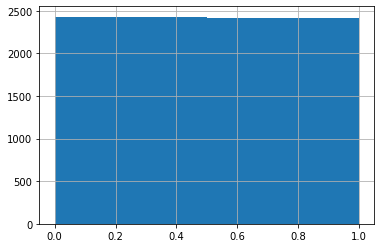

Возраст


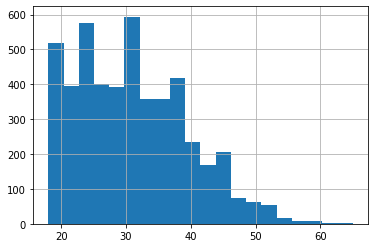

Зарплата


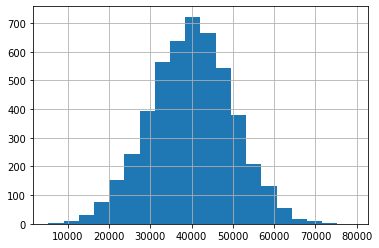

Члены семьи


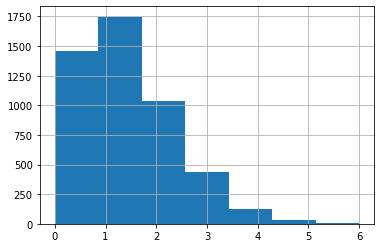

Страховые выплаты


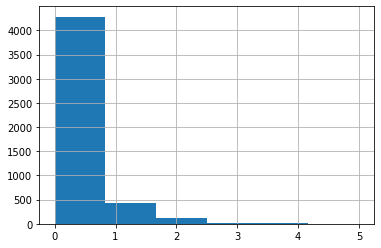

In [3]:
df = df.drop_duplicates()
display(df.describe())
for i in df:     
    print(i)
    if (len(df[i].unique()) < 20):
        df[i].hist(bins=len(df[i].unique()))
        plt.show()  
    else:        
        df[i].hist(bins=20)
        plt.show()

<font color='DarkBlue'> 
📌 Предоставлено большое количество исходных данных, отсутствуют явные выбросы <br>    
📌 Соотношение полов приблизительно равнозначное <br>  
📌 Распределение зарплат нормальное, наблюдается явно прослеживаемое усредненное значение <br> 
📌 В выборке большое количество молодых людей, а также имеющих малое количество членов семьи <br>     
📌 В большинстве объектов страховые выплаты отсутствуют <br>    
📌 Рекомендуется преобразовать типы данных полей для оптимизации памяти <br>   
</font> 

In [4]:
for i in df.select_dtypes(include=['float']):
    if df[df[i] % 1 > 0][i].count() == 0:
        df[i] = df[i].astype('int')
df[df.select_dtypes(include=['int']).columns] = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   uint8  
 1   Возраст            4847 non-null   uint8  
 2   Зарплата           4847 non-null   float32
 3   Члены семьи        4847 non-null   uint8  
 4   Страховые выплаты  4847 non-null   uint8  
dtypes: float32(1), uint8(4)
memory usage: 75.7 KB


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

<font color='DarkBlue'> 
📌 Сначала рекомендуется использовать встроенный в библиотеку алгоритм линейной регрессии для вычисления основной метрики качества R2, являющейся основным критерием сравнения моделей в текущей задаче <br>    
📌 Необходимо выделить целевой признак и произвести масштабирование заданных <br>  
</font> 

In [5]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
scaler = StandardScaler()
scaler.fit(features) 
features = scaler.transform(features)

In [6]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target, predictions))

R2: 0.43020102044842046


<font color='DarkBlue'> 
📌 Значение больше 0, соответственно, результат лучше, чем у элементарной Dummy, значит модель адекватная. Но метрика не достаточно близка к значению идеального варианта модели 1 <br>    
📌 Далее требуется подробно описать алгоритм линейной регрессии для возможности изменения его внутренних параметров <br>  
</font> 

In [7]:
class LinearRegressionCustom:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        print('Вектор w:', w)
        self.w = w[1:]
        self.w0 = w[0]
    def predict(self, features_test):
        return np.dot(features_test, self.w) + self.w0
model = LinearRegressionCustom()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target, predictions))

Вектор w: [ 0.15225913  0.00473007  0.30692827 -0.00138601 -0.01565625]
R2: 0.4302010173600872


<font color='DarkBlue'> 
📌 Далее нужно задать ключ P в виде матрицы для шифрования данных, поступающих на вход модели. Его размерность должна совпадать с количеством признаков. Также матрица должна быть обратима, чтобы после умножения на соответствующую с предоставленными данными выявлялась матрица с исходным размером <br>     
</font>

In [8]:
np.random.seed(12345)
P = np.random.normal(5, 3, size=(4, 4))
print('Матрица P \n', P)
print('-----')
print('Проверка на обратимость \n', np.linalg.inv(P))

Матрица P 
 [[ 4.38587702  6.43683001  3.44168385  3.33280909]
 [10.89734172  9.1802175   5.27872363  5.84523846]
 [ 7.3070677   8.73930421  8.02156807  1.11133667]
 [ 5.8249749   5.68673864  9.05875051  7.65928802]]
-----
Проверка на обратимость 
 [[-0.32623872  0.21940767  0.02914528 -0.02971412]
 [ 0.38685507 -0.11244237  0.0014414  -0.08273138]
 [-0.14216466 -0.07870645  0.11931389  0.10461387]
 [ 0.12902281  0.00970956 -0.16434977  0.09085502]]


<font color='DarkBlue'> 
📌 Необходимо домножить исходную матрицу со значениями признаков для обучения на матрицу P. Соответственно, при получении предсказаний в алгоритме модели необходимо осуществить домножение на тот же ключ <br>     
</font>

In [9]:
class LinearRegressionCustom:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), np.dot(features_train, P)), axis=1)
        y = target_train
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        print('Вектор w:', w)
        self.w = w[1:]
        self.w0 = w[0]
    def predict(self, features_test):
        return np.dot(np.dot(features_test, P), self.w) + self.w0   
model = LinearRegressionCustom()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target, predictions))

Вектор w: [ 0.15225913  0.0662241  -0.03138863 -0.02663292  0.00239577]
R2: 0.4302010173600872


<font color='DarkBlue'> 
📌 После соответствующих манипуляций можно заметить, что ключевая метрика не изменилась <br>     
📌 Далее можно описать обоснование указанного вывода, построенного на предложенном в задании решении <br>  
</font>

**Исходная формула обучения:**
$$
a = Xw,
$$
где
$$
w = (X^T X)^{-1} X^T y
$$
---
$$
a = X(X^T X)^{-1} X^T y
$$
**Преобразованная формула обучения:**
$$
a_{1} = XPw,
$$
где
$$
w = ((XP)^T XP)^{-1} (XP)^T y
$$
---
$$
a_{1} = XP ((XP)^T XP)^{-1} (XP)^T y
$$

$$
a_{1} = XP (X^T XP)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
a_{1} = XP P^{-1} (X^T X)^{-1} E X^T y
$$

$$
a_{1} = X E (X^T X)^{-1} X^T y
$$

<font color='DarkBlue'> 
📌 Следовательно, матрица P обозначена верно, предсказания до преобразования $a$ и после $a_{1}$ аналогичны <br>     
</font>

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии, измеряемое значением метрики R2, не изменяется

**Обоснование:** Параметры линейной регрессии в исходной задаче и в преобразованной различаются - веса w, так как выполняется умножение матрицы признаков на генерируемую, соответственно, меняется угол отклонения интерполируемой прямой

## Алгоритм преобразования

<font color='DarkBlue'> 
📌 Предложенный алгоритм преобразования данных для задачи представляет использование транспонированного результата умножения ранее обозначенного ключа P, просуммированного с любой скалярной величиной, на транспонированную выборку исходной матрицы признаков <br>  
📌 Далее обозначено обоснование предложенного алгоритма, указывающего на соответствие предсказаний целевому признаку также при его преобразовании <br>     
</font>

**Преобразованная формула обучения:**
$$
a_{1} = ((P+b)X^T)^T w,
$$

$$
a_{1} = X (P+b)^T w,
$$
где
$$
w = ((X (P+b)^T)^T X (P+b)^T)^{-1} (X (P+b)^T)^T y
$$
---
$$
a_{1} = X (P+b)^T ((X (P+b)^T)^T X (P+b)^T)^{-1} (X (P+b)^T)^T y
$$

$$
a_{1} = X (P+b)^T ((P+b)X^T X(P+b)^T)^{-1} (P+b)X^T y
$$

$$
a_{1} = X (P+b)^T (X^T X(P+b)^T)^{-1} (P+b)^{-1} (P+b)X^T y
$$

$$
a_{1} = X (P+b)^T ((P+b)^T)^{-1}(X^T X)^{-1} E X^T y
$$

$$
a_{1} = X E (X^T X)^{-1} X^T y
$$

**Алгоритм**: Указан выше

**Обоснование**: Параметры линейной регрессии в исходной задаче и в преобразованной различаются - веса w, так как выполняется умножение матрицы признаков на генерируемую, соответственно, также меняется угол отклонения интерполируемой прямой

## Проверка алгоритма

<font color='DarkBlue'> 
📌 Требуется запрограммировать предложенный алгоритм, применив матричные операции <br>    
</font>

In [10]:
class LinearRegressionCustom:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), np.dot(P + 5.5, features_train.T).T), axis=1)
        y = target_train
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        print('Вектор w:', w)
        self.w = w[1:] * 1.1
        self.w0 = w[0]
    def predict(self, features_test):
        return np.dot(np.dot(P + 5.5, features_test.T).T, self.w / 1.1) + self.w0   
model = LinearRegressionCustom()
model.fit(features, target)
predictions = model.predict(features)
print('R2:', r2_score(target, predictions))

Вектор w: [ 0.15225913  0.10720822 -0.04004488  0.00547229 -0.04137506]
R2: 0.4302010173600873


<font color='DarkBlue'> 
📌 В соответствии с отсутствием изменения метрики R2 качество линейной регрессии из sklearn не отличается до и после преобразования <br>      
📌 На основании произведенных исследований можно сформировать следующие выводы:   
    
- предоставленные данные хорошего качества, отсутствуют пропуски и некорректные значения, содержится небольшое количество дубликатов, для более удобного анализа необходимо преобразование типов данных в форматы, занимающие меньший объем памяти
- все предложенные алгоритмы соответствуют цели исходной задачи - преобразования данных для обеспечения возможности шифрования при указаннойм количестве признаков в предоставленных выборках
- создан необходимый ключ, представляющий матрицу, обозначенные алгоритмы проверены и обоснованы <br> 
</font>